# import geopandas as gpd
import matplotlib.pyplot as plt

import shp files using geopandas

In [2]:
area_of_interest = gpd.read_file('Shapefiles/area_of_interest.shp')
atms = gpd.read_file('Shapefiles/atms.shp')
districts = gpd.read_file('Shapefiles/districts.shp')

inspect values contained in the data

In [3]:
districts.head()

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."


In [4]:
area_of_interest.head()

,Id,geometry
0,0,"POLYGON ((-7.10243 54.53227, -7.10175 54.53254..."


In [5]:
atms.head()

,operator,geometry
0,Northern Bank,MULTIPOINT (-6.65841 54.50122)
1,NaN,MULTIPOINT (-6.22666 54.72956)
2,Bank of Ireland,MULTIPOINT (-6.22038 54.80819)
3,NaN,MULTIPOINT (-6.29858 54.43323)
4,NaN,MULTIPOINT (-6.21401 54.59141)


visualize the image contained in the data

<Axes: >

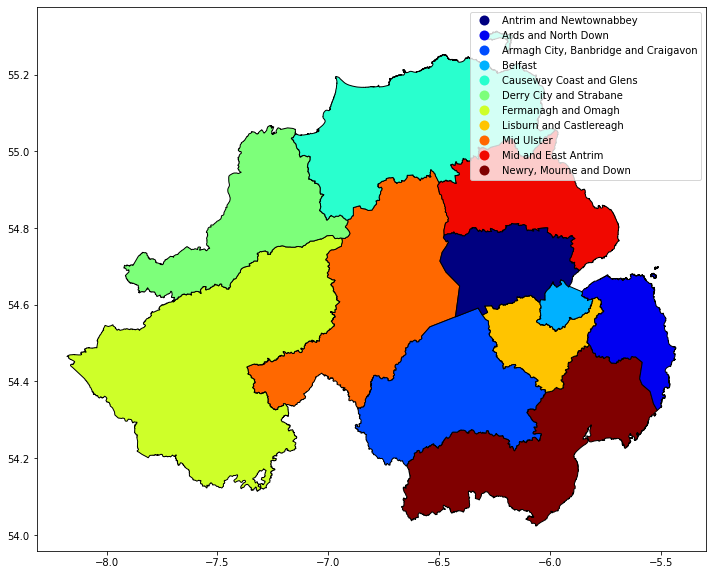

In [6]:
districts.plot(cmap='jet', edgecolor='black', column='district', figsize=(12, 12), legend=True)

visualize multiple images within the same figure

<Axes: >

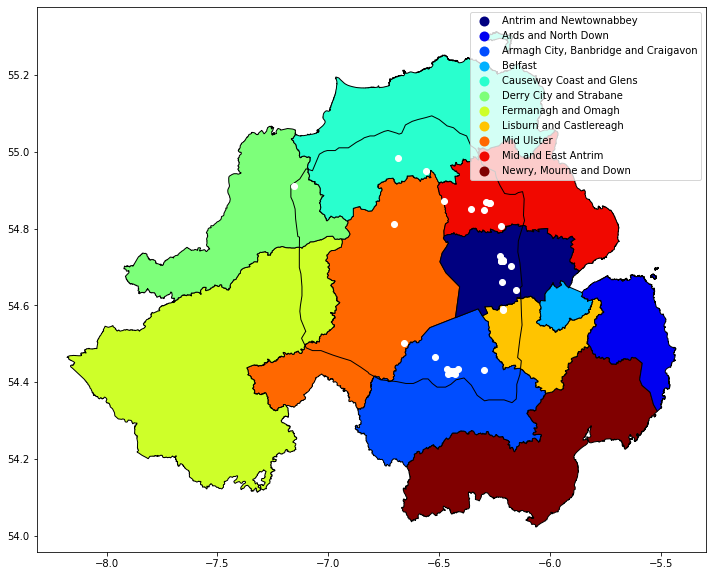

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
districts.plot(cmap='jet', edgecolor='black', column='district', legend=True, ax=ax)
area_of_interest.plot(color='none', edgecolor='black', ax=ax)
atms.plot(color='white', ax=ax)

convert the predefined geographic coordinate system into another geographic coordinate system

In [8]:
districts.crs
# epsg:4326 is the predefined geographic coordinate system

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
# converts epsg:4326 into a geographic coordinate system that are represented by meters, which is epsg:32629
area_of_interest = area_of_interest.to_crs(epsg=32629)
atms = atms.to_crs(epsg=32629)
districts = districts.to_crs(epsg=32629)

<Axes: >

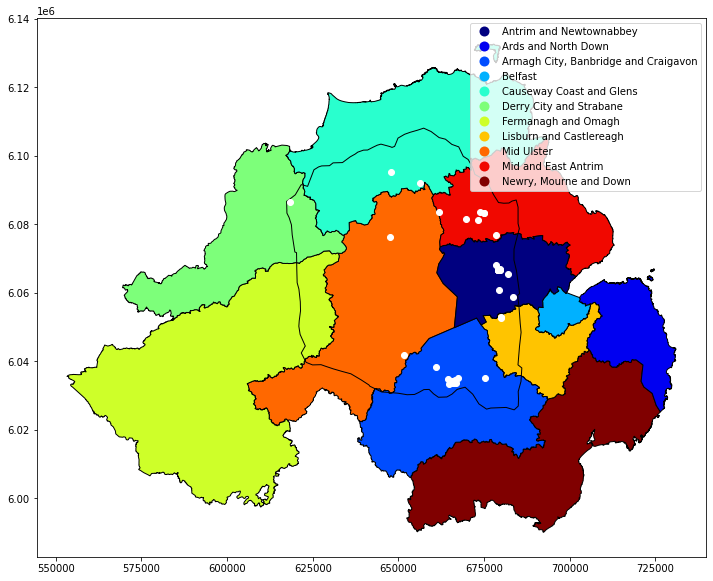

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
districts.plot(cmap='jet', edgecolor='black', column='district', legend=True, ax=ax)
area_of_interest.plot(color='none', edgecolor='black', ax=ax)
atms.plot(color='white', ax=ax)

visualize districts that are contained within the area of interest

<Axes: >

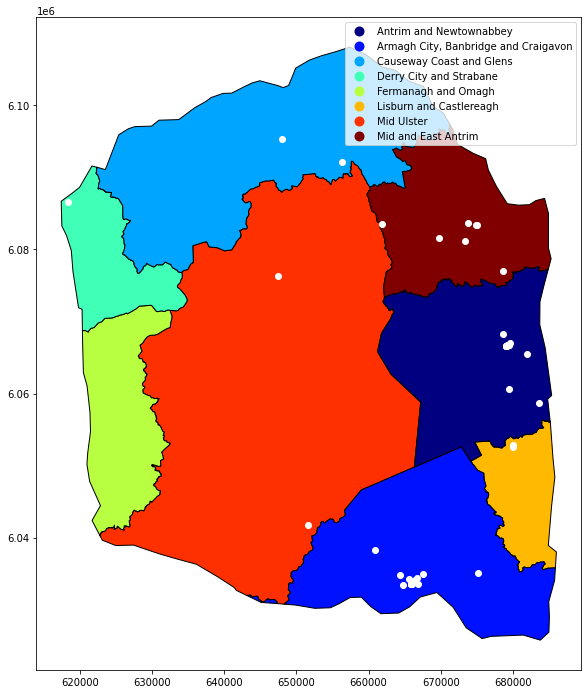

In [11]:
district_in_area_of_interest = gpd.overlay(districts, area_of_interest, how='intersection')
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
district_in_area_of_interest.plot(cmap='jet', edgecolor='black', column='district', legend=True, ax=ax)
atms.plot(color='white', ax=ax)

calculate areas of the polygons

In [12]:
district_in_area_of_interest['area'] = district_in_area_of_interest.area
district_in_area_of_interest.head()

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((658023.630 6091903.404, 658030.243 6...",1.574420e+09
1,Mid and East Antrim,0,"POLYGON ((684908.771 6077240.941, 684903.541 6...",3.736911e+08
2,Lisburn and Castlereagh,0,"POLYGON ((685894.090 6035737.164, 685891.166 6...",1.517379e+08
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((676033.306 6048080.158, 676033...",5.539328e+08
4,Antrim and Newtownabbey,0,"POLYGON ((682239.947 6077405.626, 682246.748 6...",4.628229e+08
